In [100]:
import numpy as np
import pandas as pd

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
filename = '/content/drive/MyDrive/python/pandas/data.csv'
data = pd.read_csv(filename, encoding='CP949', index_col=False)

In [103]:
data.columns

Index(['저장한 날짜: 2019/10/24 11:09:57', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3'],
      dtype='object')

In [104]:
data.index

RangeIndex(start=0, stop=4022, step=1)

In [105]:
data = data[4:]

In [106]:
data = data.rename(columns={'저장한 날짜: 2019/10/24 11:09:57' : 'series', 'Unnamed: 1' : 'temp', 'Unnamed: 2' : 'q1',	'Unnamed: 3' : 'q2'})

In [107]:
data

,series,temp,q1,q2
4,2006/1/1,3.6,8,1
5,2006/1/2,4,8,1
6,2006/1/3,3.7,8,1
7,2006/1/4,4,8,1
8,2006/1/5,3.6,8,1
...,...,...,...,...
4017,2016/12/27,11.1,8,2
4018,2016/12/28,6,8,2
4019,2016/12/29,4.3,8,2
4020,2016/12/30,6,8,2


In [108]:
for i in range(4,4022):
  data = data.rename(index={i:i-3})

In [110]:
print(data.loc[1]['series'])

2006/1/1


In [111]:
data.loc[3]['temp'] = 4.1
data

,series,temp,q1,q2
1,2006/1/1,3.6,8,1
2,2006/1/2,4,8,1
3,2006/1/3,4.1,8,1
4,2006/1/4,4,8,1
5,2006/1/5,3.6,8,1
...,...,...,...,...
4014,2016/12/27,11.1,8,2
4015,2016/12/28,6,8,2
4016,2016/12/29,4.3,8,2
4017,2016/12/30,6,8,2


In [112]:
# transpose
data.transpose()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3979,3980,3981,3982,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000,4001,4002,4003,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018
series,2006/1/1,2006/1/2,2006/1/3,2006/1/4,2006/1/5,2006/1/6,2006/1/7,2006/1/8,2006/1/9,2006/1/10,2006/1/11,2006/1/12,2006/1/13,2006/1/14,2006/1/15,2006/1/16,2006/1/17,2006/1/18,2006/1/19,2006/1/20,2006/1/21,2006/1/22,2006/1/23,2006/1/24,2006/1/25,2006/1/26,2006/1/27,2006/1/28,2006/1/29,2006/1/30,2006/1/31,2006/2/1,2006/2/2,2006/2/3,2006/2/4,2006/2/5,2006/2/6,2006/2/7,2006/2/8,2006/2/9,...,2016/11/22,2016/11/23,2016/11/24,2016/11/25,2016/11/26,2016/11/27,2016/11/28,2016/11/29,2016/11/30,2016/12/1,2016/12/2,2016/12/3,2016/12/4,2016/12/5,2016/12/6,2016/12/7,2016/12/8,2016/12/9,2016/12/10,2016/12/11,2016/12/12,2016/12/13,2016/12/14,2016/12/15,2016/12/16,2016/12/17,2016/12/18,2016/12/19,2016/12/20,2016/12/21,2016/12/22,2016/12/23,2016/12/24,2016/12/25,2016/12/26,2016/12/27,2016/12/28,2016/12/29,2016/12/30,2016/12/31
temp,3.6,4,4.1,4,3.6,2.1,2.8,4.2,3.7,4.3,6.1,6.1,4,6.6,10.7,9,8,5.6,4.2,4,1.3,3.1,2.5,4.4,5.5,6,6.8,5.5,6,8.4,7.1,5.7,7.8,6,1.6,1.9,2,3.6,7.9,4.6,...,14,11.4,2.8,5.6,8.3,10.6,11.1,10.5,8.8,10,11.5,10.8,11.6,12.7,10.8,7.5,8.6,11.1,8.5,6.8,7,9.4,8.1,6.2,4.8,6.7,8.2,10,9.6,10.5,14.6,14,8.6,6.6,6.9,11.1,6,4.3,6,6.3
q1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
q2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [113]:
# 특정 column을 index로
data2 = data.set_index('series')

In [114]:
data = data.rename(columns={'date' : 'series'})

In [118]:
data['year'] = data['series'].str.split('/').str[0]
data['month'] = data['series'].str.split('/').str[1]
data['date'] = data['series'].str.split('/').str[2]
data

,series,temp,q1,q2,year,month,date
1,2006/1/1,3.6,8,1,2006,1,1
2,2006/1/2,4,8,1,2006,1,2
3,2006/1/3,4.1,8,1,2006,1,3
4,2006/1/4,4,8,1,2006,1,4
5,2006/1/5,3.6,8,1,2006,1,5
...,...,...,...,...,...,...,...
4014,2016/12/27,11.1,8,2,2016,12,27
4015,2016/12/28,6,8,2,2016,12,28
4016,2016/12/29,4.3,8,2,2016,12,29
4017,2016/12/30,6,8,2,2016,12,30


In [127]:
# 기온 품질 균질 숫자형으로 변환
data['temp'] = data['temp'].astype(float)
data['q1'] = data['q1'].astype(float)
data['q2'] = data['q2'].astype(float)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 1 to 4018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   series  4018 non-null   object 
 1   temp    4018 non-null   float64
 2   q1      4018 non-null   float64
 3   q2      4018 non-null   float64
 4   year    4018 non-null   object 
 5   month   4018 non-null   object 
 6   date    4018 non-null   object 
dtypes: float64(3), object(4)
memory usage: 411.1+ KB


In [137]:
data.loc[data['year'] == '2009']

,series,temp,q1,q2,year,month,date
1097,2009/1/1,6.2,8.0,1.0,2009,1,1
1098,2009/1/2,6.9,8.0,1.0,2009,1,2
1099,2009/1/3,6.6,8.0,1.0,2009,1,3
1100,2009/1/4,7.5,8.0,1.0,2009,1,4
1101,2009/1/5,8.5,8.0,1.0,2009,1,5
...,...,...,...,...,...,...,...
1457,2009/12/27,9.4,8.0,1.0,2009,12,27
1458,2009/12/28,9.4,8.0,1.0,2009,12,28
1459,2009/12/29,8.1,8.0,1.0,2009,12,29
1460,2009/12/30,9.2,8.0,1.0,2009,12,30


In [140]:
data.loc[data['year'] == '2009'].loc[data.loc[data['year'] == '2009']['month'] == '7']

,series,temp,q1,q2,year,month,date
1278,2009/7/1,23.3,8.0,1.0,2009,7,1
1279,2009/7/2,21.2,8.0,1.0,2009,7,2
1280,2009/7/3,23.2,8.0,1.0,2009,7,3
1281,2009/7/4,24.0,8.0,1.0,2009,7,4
1282,2009/7/5,23.8,8.0,1.0,2009,7,5
1283,2009/7/6,23.7,8.0,1.0,2009,7,6
1284,2009/7/7,26.9,8.0,1.0,2009,7,7
1285,2009/7/8,26.5,8.0,1.0,2009,7,8
1286,2009/7/9,27.9,8.0,1.0,2009,7,9
1287,2009/7/10,28.3,8.0,1.0,2009,7,10


In [138]:
data[''].groupby(['year', 'month']).mean().sort_values(by='temp', ascending=False)[:30]

temp   q1   q2
year month                     
2010 8      29.635484  8.0  1.0
2013 8      29.183871  8.0  1.0
2012 8      29.070968  8.0  1.0
2007 8      29.012903  8.0  1.0
2010 7      27.996774  8.0  1.0
2014 8      27.661290  8.0  1.0
2006 8      27.529032  8.0  1.0
2011 8      27.464516  8.0  1.0
     7      27.293548  8.0  1.0
2013 7      27.270968  8.0  1.0
2016 8      27.116129  8.0  2.0
2008 7      26.993548  8.0  1.0
     8      26.803226  8.0  1.0
2014 7      26.777419  8.0  1.0
2015 8      26.674194  8.0  2.0
2009 8      26.606452  8.0  1.0
2012 7      26.425806  8.0  1.0
2009 7      26.287097  8.0  1.0
2015 7      26.248387  8.0  2.0
2012 9      26.173333  8.0  1.0
2006 7      25.590323  8.0  1.0
2016 7      25.374194  8.0  2.0
2007 9      25.173333  8.0  1.0
2013 9      25.156667  8.0  1.0
2010 9      25.143333  8.0  1.0
2011 9      25.130000  8.0  1.0
2016 9      24.400000  8.0  2.0
2007 7      24.387097  8.0  1.0
2008 9      24.386667  8.0  1.0
2010 6      23.633333  8.0  1.0

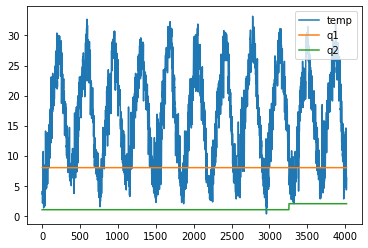

In [142]:
# 판다스 내장 그래프
data.plot()
# data.plot(kind='bar') : bar graph
# kind='hist' : histogram
# kind='scatter' : point

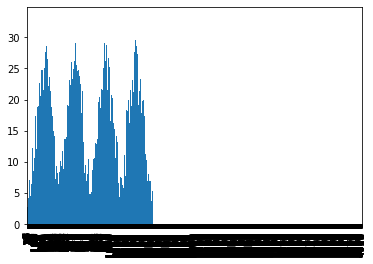